In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import requests

In [9]:
UKwiki=requests.get("https://en.wikipedia.org/wiki/United_Kingdom")

In [10]:
from bs4 import BeautifulSoup
UKDf = BeautifulSoup(UKwiki.content, "lxml")

In [11]:
UKText = UKDf.getText(strip=True)

In [6]:
for oprn in [r'\[\d+\]', r'\(\d+\)', r'\(\w+\)', r'\[\w+\]', r'[0-9]+', "\xa0°C"]:
    UKText = re.sub(oprn, " ", UKText)

In [7]:
from nltk.tokenize import sent_tokenize


In [13]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
UKSentances = sent_tokenize(UKText)

In [16]:
UKSentences = pd.DataFrame(UKSentances, columns=['sentence'])

In [36]:
from textblob import TextBlob
s1 = TextBlob("The United Kingdom of Great Britain and Northern Ireland, commonly known as the United Kingdom (UK) or Britain,[m] is a country in Northwestern Europe, off the coast of the continental mainland. It comprises England, Scotland, Wales, and Northern Ireland")

In [37]:
s1.sentiment

Sentiment(polarity=0.25, subjectivity=0.625)

In [38]:

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Neutral"
    else:
        return "Negative"

In [41]:
UKSentences['sentiment'] = [str(analyze_sentiment(x)) for x in UKSentences.sentence]


In [42]:
UKSentences['sentiment'].value_counts()


,count
sentiment,
Neutral,1359
Positive,633
Negative,122


In [44]:
from nltk.tokenize import word_tokenize

UKWords = word_tokenize(UKText)

In [45]:
UKWords = [w.lower() for w in UKWords]


In [47]:
UKWords = [w for w in UKWords if w.isalnum()]

In [50]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
english_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
UKWords = [w for w in UKWords if not w in english_stopwords]

In [52]:
UKWords = [w for w in UKWords if len(w)>2]

In [53]:
from nltk.probability import FreqDist
wordfreq = FreqDist(UKWords)

In [54]:
wordfreq. most_common(20)

[('original', 237),
 ('united', 221),
 ('kingdom', 160),
 ('british', 144),
 ('archived', 126),
 ('ireland', 124),
 ('fromthe', 123),
 ('britain', 116),
 ('2023', 114),
 ('world', 113),
 ('originalon', 108),
 ('scotland', 106),
 ('england', 105),
 ('northern', 96),
 ('2024', 95),
 ('government', 88),
 ('may', 77),
 ('london', 77),
 ('march', 76),
 ('wales', 75)]

In [55]:
from wordcloud import WordCloud

In [56]:
UK_Words = ("").join(UKWords)

In [64]:
print(UK_Words)

unitedkingdomwikipediajumpcontentmainmenumainmenumovesidebarhidenavigationmainpagecontentscurrenteventsrandomarticleaboutwikipediacontactuscontributehelplearneditcommunityportalrecentchangesuploadfilespecialpagessearchsearchappearancedonatecreateaccountloginpersonaltoolsdonatecreateaccountloginpagesloggededitorslearnmorecontributionstalkcontentsmovesidebarhidetop1etymologyterminology2historytogglehistorytreatyenglandkingdomgreatbritainwarspartition20thcentury3geographytogglegeographypoliticscriminaleconomysupplysanitation6demographicstoggledemographicsculturealso9notes10references11externallinkstoggleexternallinkstablecontentsunitedkingdom305banyumasanбашҡортсабеларускаябеларускаятарашкевіцаrumagnòlэрзяньespañolesperantoestremeñueuskaraeʋegbeفارسیfijigõychikonknni客家語indonesiainterlinguainterlingueᐃᓄᒃᑎᑐᑦayisyenkriyòlgwiyannenkurdîкыргызчакырыкмарыladinladinoລາວlatgaļulatinalatviešulëtzebuergeschлезгиlietuviųligurelimburgslingálalinguafrancanovalivvinkarjalalavosabokmålnorsknynorsknouorm

In [62]:

wordcloud = WordCloud(width = 1000, height = 500, stopwords = "english_stopwords",max_words=100, colormap="plasma", collocations=False).generate(str(UK_Words))

In [82]:
words = word_tokenize(UKText)
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
print("Filtered Words Sample:", filtered_words[:20])

Filtered Words Sample: ['United', 'Kingdom', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhideNavigationMain', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usContributeHelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonateCreate']


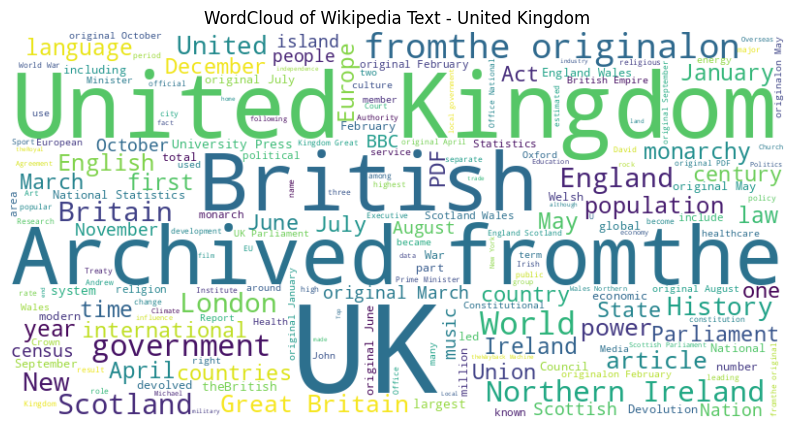

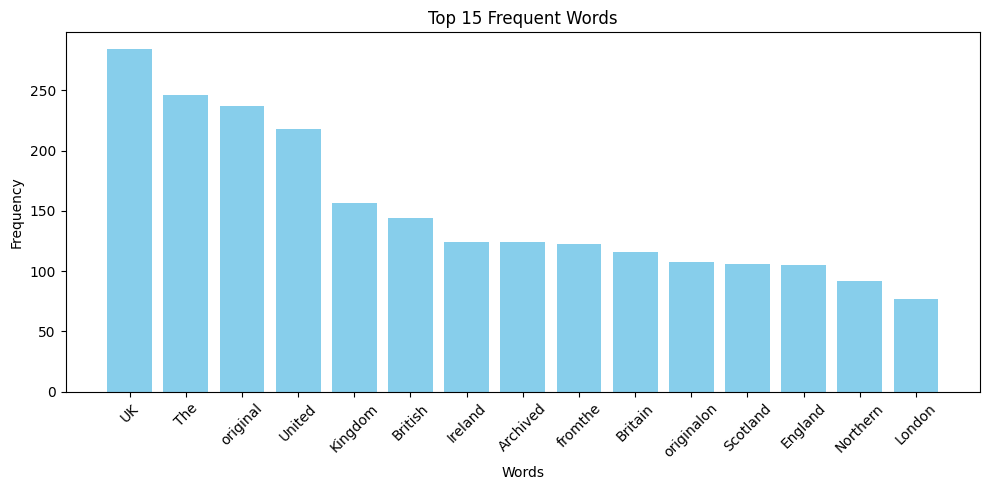

In [84]:
all_words = ' '.join(filtered_words)

# WordCloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Wikipedia Text - United Kingdom")
plt.show()

# Top 15 Words Bar Plot
from collections import Counter
word_freq = Counter(filtered_words)
most_common_words = word_freq.most_common(15)

words, freqs = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, freqs, color='skyblue')
plt.title("Top 15 Frequent Words")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [69]:
UKSentences

,sentence,Sentiment,sentiment
0,United Kingdom - WikipediaJump to contentMain ...,Positive,Positive
1,"For other uses, seeUnited Kingdom (disambiguat...",Positive,Positive
2,"It comprisesEngland,Scotland,Wales, andNorther...",Neutral,Neutral
3,"[n]The UK includes the island ofGreat Britain,...",Positive,Positive
4,[f]Northern Ireland sharesa land borderwith th...,Neutral,Neutral
...,...,...,...
2109,The Library of Congress.,Neutral,Neutral
2110,Retrieved11 January2022.External linksUnited K...,Negative,Negative
2111,Declared itself a republic in 1970.vteEnglish-...,Positive,Positive
2112,"By using this site, you agree to theTerms of U...",Neutral,Neutral


In [70]:
UKSentences = UKSentences[UKSentences["sentiment"] != "Neutral"]


In [71]:
UKSentences["sentiment"] = UKSentences["sentiment"].map({"Negative": 0, "Positive": 1})


<ipython-input-71-36b3df1f78b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKSentences["sentiment"] = UKSentences["sentiment"].map({"Negative": 0, "Positive": 1})


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:

X_train, X_test, y_train, y_test = train_test_split(
    UKSentences["sentence"], UKSentences["sentiment"],
    test_size=0.20, random_state=42
)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [76]:

tfidf = TfidfVectorizer(max_features=1000, stop_words="english", ngram_range=(1,1))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [77]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [91]:
sentiment_counts_after_smote = Counter(y_train_resampled)
sentiment_df = pd.DataFrame(list(sentiment_counts_after_smote.items()), columns=['Sentiment', 'Count'])

sentiment_df['Sentiment'] = sentiment_df['Sentiment'].map({0: 'Negative', 1: 'Positive'})
print(sentiment_df)

  Sentiment  Count
0  Negative    508
1  Positive    508


In [87]:
from collections import Counter

print("Original dataset shape %s" % Counter(y_train))
print("Resampled dataset shape %s" % Counter(y_train_resampled))

Original dataset shape Counter({1: 508, 0: 96})
Resampled dataset shape Counter({0: 508, 1: 508})


In [86]:
# prompt: after smote give code to show count of positive
# and negetive

from collections import Counter

print("Original dataset shape %s" % Counter(y_train))
print("Resampled dataset shape %s" % Counter(y_train_resampled))


Original dataset shape Counter({1: 508, 0: 96})
Resampled dataset shape Counter({0: 508, 1: 508})


In [78]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)  # Train on resampled data
y_pred_lr = lr.predict(X_test_tfidf)  # Use test data (no resampling!)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8079470198675497
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.62      0.52        26
           1       0.91      0.85      0.88       125

    accuracy                           0.81       151
   macro avg       0.69      0.73      0.70       151
weighted avg       0.84      0.81      0.82       151



In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9,splitter="best")
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test_tfidf)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7748344370860927
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.12      0.15        26
           1       0.83      0.91      0.87       125

    accuracy                           0.77       151
   macro avg       0.52      0.51      0.51       151
weighted avg       0.73      0.77      0.75       151



In [93]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.847682119205298
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53        26
           1       0.90      0.92      0.91       125

    accuracy                           0.85       151
   macro avg       0.73      0.71      0.72       151
weighted avg       0.84      0.85      0.84       151



In [94]:
from sklearn.naive_bayes import GaussianNB
gb = GradientBoostingClassifier()
gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb.predict(X_test_tfidf)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7947019867549668
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.31      0.34        26
           1       0.86      0.90      0.88       125

    accuracy                           0.79       151
   macro avg       0.62      0.60      0.61       151
weighted avg       0.78      0.79      0.79       151



In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test_tfidf)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.37748344370860926
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.92      0.34        26
           1       0.94      0.26      0.41       125

    accuracy                           0.38       151
   macro avg       0.57      0.59      0.38       151
weighted avg       0.82      0.38      0.40       151



In [97]:
import joblib # Import the joblib module
rf_model = rf # Assign the random forest model to 'rf_model'
tfidf_vectorizer = tfidf # Assign the TF-IDF vectorizer to 'tfidf_vectorizer'

joblib.dump(rf_model, 'uk_random_forest_sentiment_model.pkl')
joblib.dump(tfidf_vectorizer, 'uk_tfidf_vectorizer.pkl')

['uk_tfidf_vectorizer.pkl']